In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import scipy.stats
import numpy as np

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

a = [5,7,7,9,10,16,7,14,13,15,16,15,16,17,18,13,14,15,6,13]


print(mean_confidence_interval(a, 0.95))
 

(10.391179971291619, 12.3, 14.208820028708383)


# Задания для самостоятельного решения


1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [ ]:
from math import ceil
delta = 3
sigma = 225 ** 0.5
b = 0.95
z = scipy.stats.norm.ppf((1 + b)/2)
n = ceil((z * sigma / delta) ** 2)
print(f'Минимально необходимый объем выборки: \033[1m{n}\033[1m')

Минимально необходимый объем выборки: 97


2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22614fddd0>]],
      dtype=object)

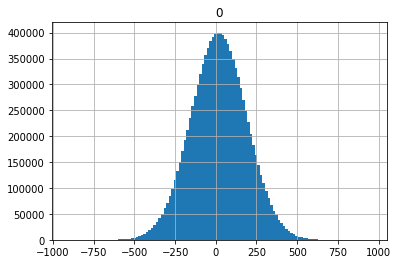

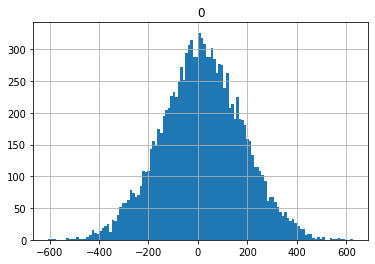

In [ ]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

pd.DataFrame(population_men).hist(bins=120)
pd.DataFrame(population_women).hist(bins=120)


In [ ]:
stats.ttest_ind(a=population_men,b=population_women,equal_var=False)

Ttest_indResult(statistic=2.073546911730484, pvalue=0.03814264482126858)

p-value больше 0.001, что говорит о верности нулевой гипотезы (равенстве мат. ожиданий выборок). Проверим, не превышает ли вычисленная t-статистика табличную.

In [ ]:
dfs = (len(population_men)/2 - 1) + (len(population_women)/2 - 1)
table_t = stats.t.ppf(0.999, dfs)
print(table_t)

3.0902337863958467


Табличное значение превышает вычисленное значение t-статистики – 0.7707. Это означает, что мы не можем отвергнуть нулевую гипотезу. Значит, средние двух выборок равны при условии их нормального распределения.

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [ ]:
delta = 50
sigma = 150
b = 0.95
z = scipy.stats.norm.ppf((1 + b)/2)
n = ceil((z * sigma / delta) ** 2)
print(f'Минимально необходимый объем выборки: \033[1m{n}\033[1m')

Минимально необходимый объем выборки: 35


4[*].  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [ ]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [ ]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.
print(pvalue)

0.08323639416753109


**Вывод:** На основании того, что p-value не превосходит уровень значимости (0.08 > 0.05), можно сказать, что наши результаты не позволили обнаружить различия между предсказаниями волшебника и реальными данными. Иначе говоря, располагая исходными данными и принимая уровень значимости равным 0.05, мы не можем "статистически" разоблачить мага. Но сказать, что он умеет предсказывать погоду мы также не можем.

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.9):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n-1)
    return m-h, m+h

mean_confidence_interval(data)

(6.07363110319857, 7.183511753944288)

6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [ ]:
data_1 = pd.DataFrame([4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10])
data_2 = pd.DataFrame([8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3])

t, p = stats.ttest_ind(data_1 ,data_2)
t,p
#Ваш код:

(array([7.35744683]), array([2.11594756e-11]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f226166c750>]],
      dtype=object)

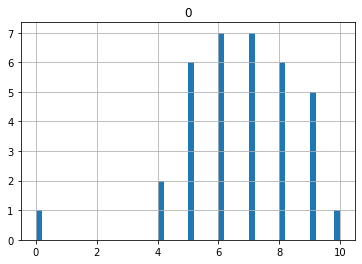

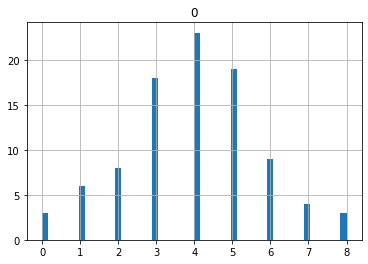

In [ ]:
data_1.hist(bins=50)
data_2.hist(bins=50)

**Вывод:** Как малое значение p-value (почти нулевое), так и сравнение гистограмм двух выборок, говорит о том, что выборки имеют статиcтически значимые различия. Мы можем отвергнуть гипотезу о том, что они принадлежат одному множеству.

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

**Вывод**:
1) Если p-value < уровня значимости (например, 0.05), значит статистически значимая разница между двумя распределениями существует. Мы можем утверждать, что при заданном уровне значимости наше распределение отличается от нормального (можем отвергнуть нулевую гипотезу).
2) Если p-value > уровня значимости, то мы не можем отвергнуть нулевую гипотезу (что распределение нормальное)

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

print(A.mean(), B.mean())

9.988742616116626 8.652564514268196


In [ ]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

**Выводы:**
а) Так как p-value > уровня значимости (0.74 > 0.05), мы не можем сказать, что (при уровне значимости 5%) имеется значимое различие эффективности препаратов А и Б и отказаться от гипотезы, что различия являются чисто случайными.
б) При p-value = 0.049 при уровне значимости 0.05 можно было бы утверждать, что различия статистически значимы.